In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Excel file into a DataFrame
data_file = 'parkinsons_data.csv'  # Replace with the path to your file
df = pd.read_csv(data_file)

#Rename variables

In [4]:
def rename_variables(df, dict_names):
    """
    Rename variables in a given dataframe.

    Parameters:
        df (pd.DataFrame): Original dataframe
        dict_names (dict): Dictionary mapping current column names to new names

    Returns:
        renamed_df (pd.DataFrame): Dataframe with renamed columns
    """
    renamed_df = df.rename(columns=dict_names)
    return renamed_df


In [5]:
# Dictionary of names
dict_names = {
    'name':'Name',
    'MDVP:Fo(Hz)': 'MDVP_Fo',
    'MDVP:Fhi(Hz)': 'MDVP_Fhi',
    'MDVP:Flo(Hz)': 'MDVP_Flo',
    'MDVP:Jitter(%)': 'MDVP_Jitter_percent',
    'MDVP:Jitter(Abs)': 'MDVP_Jitter_Abs',
    'MDVP:RAP': 'MDVP_RAP',
    'MDVP:PPQ': 'MDVP_PPQ',
    'Jitter:DDP': 'Jitter_DDP',
    'MDVP:Shimmer': 'MDVP_Shim',
    'MDVP:Shimmer(dB)': 'MDVP_Shim_dB',
    'Shimmer:APQ3': 'Shimmer_APQ3',
    'Shimmer:APQ5': 'Shimmer_APQ5',
    'MDVP:APQ': 'MDVP_APQ',
    'Shimmer:DDA': 'Shimmer_DDA',
    'NHR': 'NHR',
    'HNR': 'HNR',
    'status': 'Status',
    'RPDE': 'RPDE',
    'DFA': 'DFA',
    'spread1': 'Spread1',
    'spread2': 'Spread2',
    'D2': 'D2',
    'PPE': 'PPE'
}

# Apply the function to rename the columns
renamed_df = rename_variables(df, dict_names)

# View the result
print(renamed_df.columns)



Index(['Name', 'MDVP_Fo', 'MDVP_Fhi', 'MDVP_Flo', 'MDVP_Jitter_percent',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shim',
       'MDVP_Shim_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'Status', 'RPDE', 'DFA', 'Spread1',
       'Spread2', 'D2', 'PPE'],
      dtype='object')


#Null values detection

In [6]:
# Calculate and display the number of null values in the dataset
null_counts = renamed_df.isnull().sum()
print("\nNumber of null values in the dataset:\n", null_counts)


Number of null values in the dataset:
 Name                   0
MDVP_Fo                0
MDVP_Fhi               0
MDVP_Flo               0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shim              0
MDVP_Shim_dB           0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
Status                 0
RPDE                   0
DFA                    0
Spread1                0
Spread2                0
D2                     0
PPE                    0
dtype: int64


#Outliers

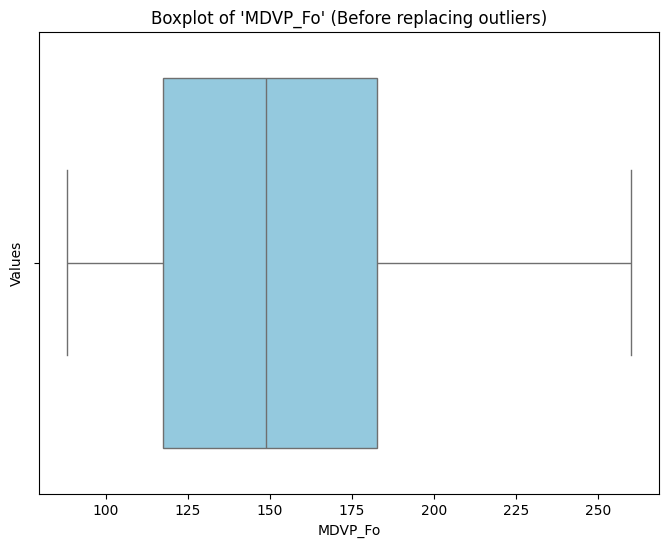

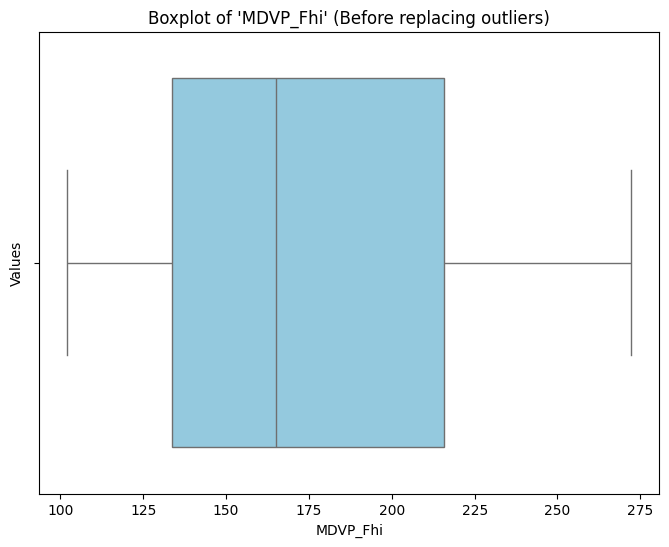

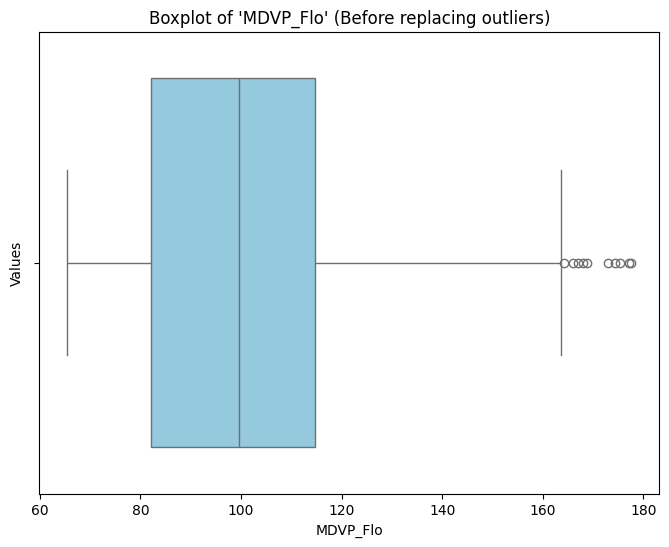

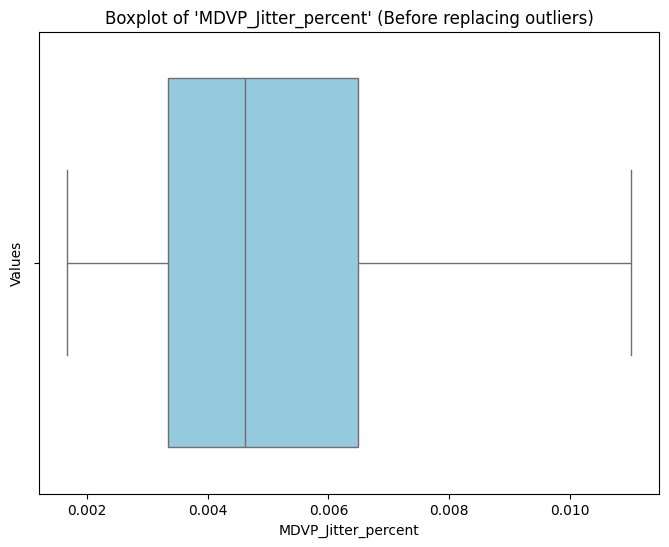

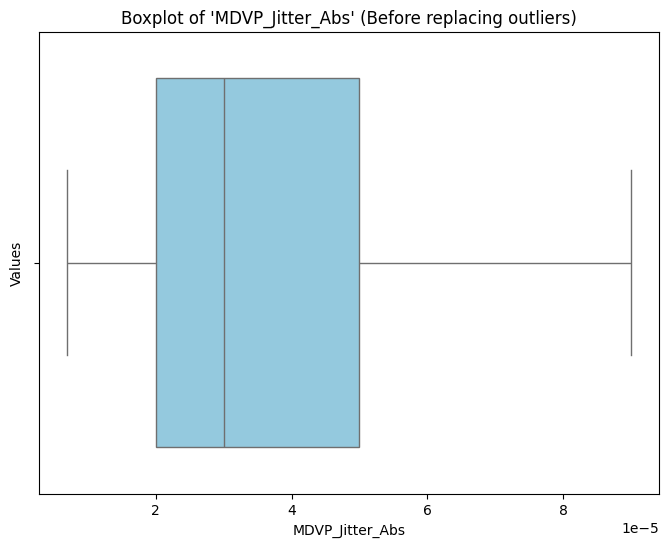

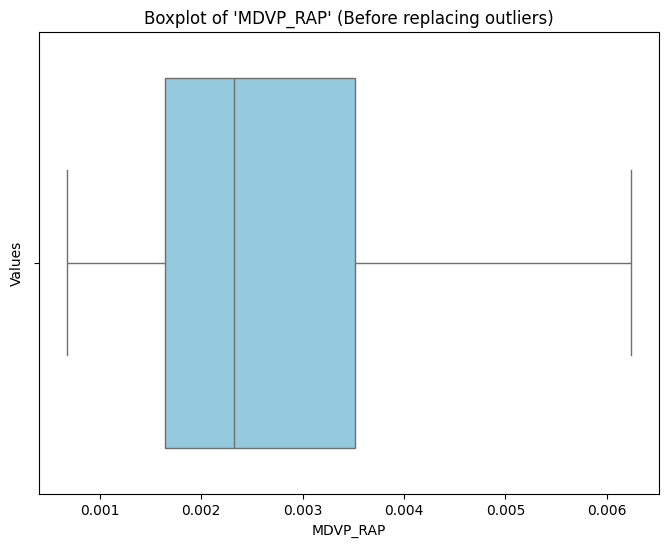

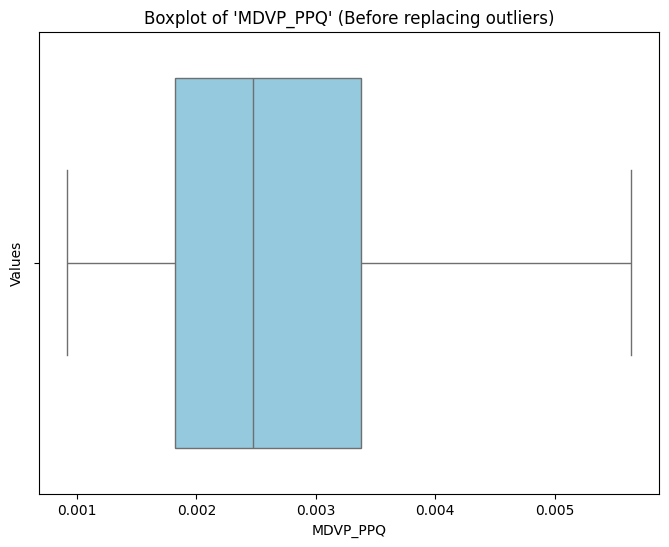

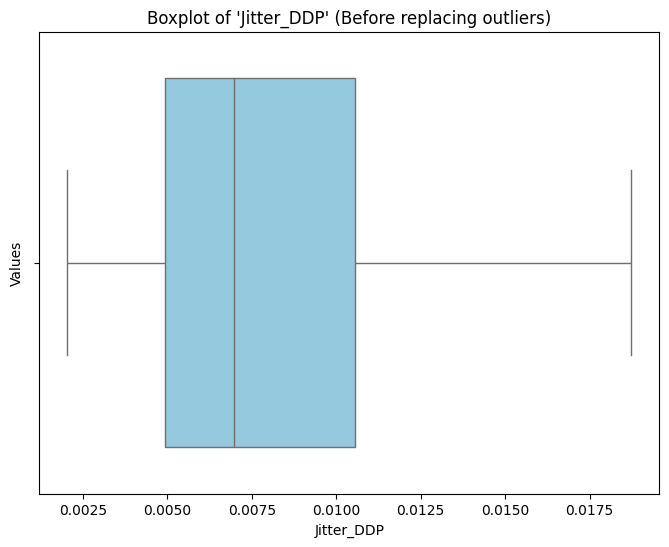

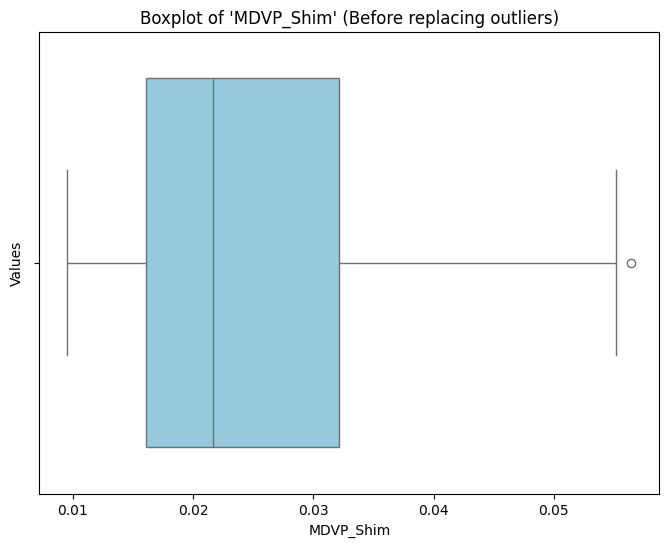

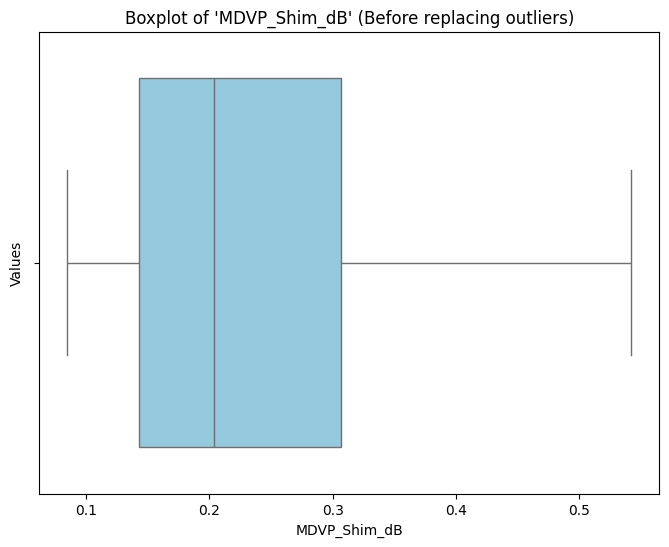

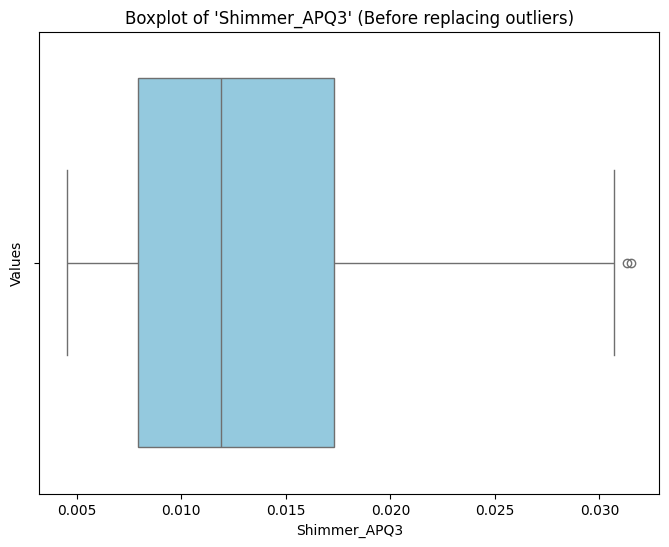

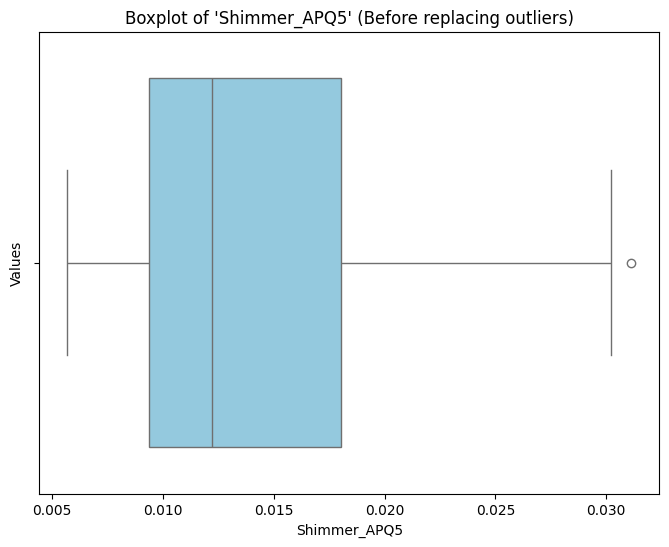

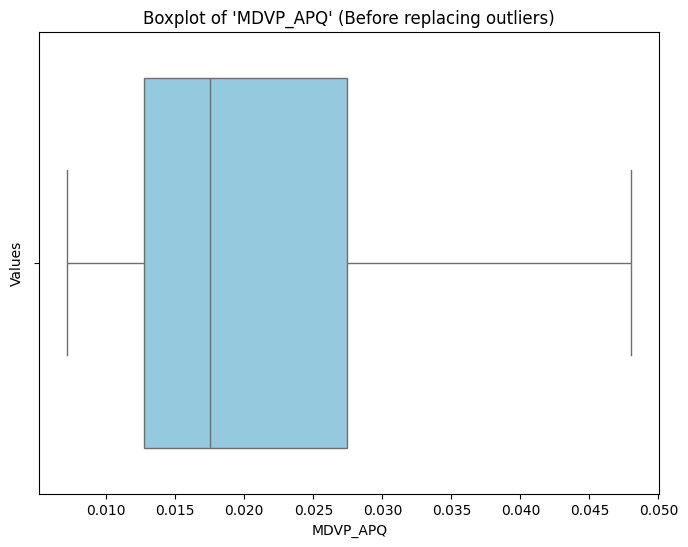

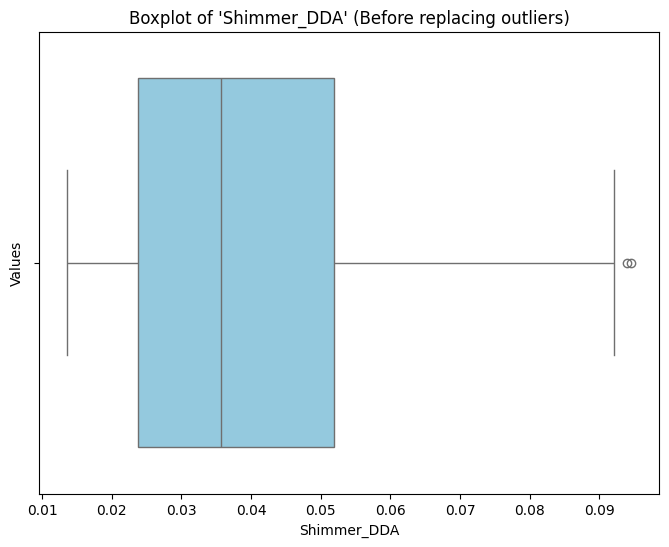

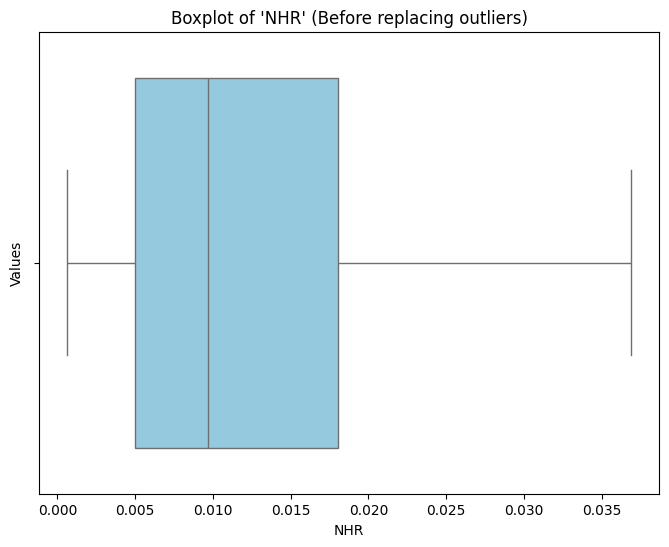

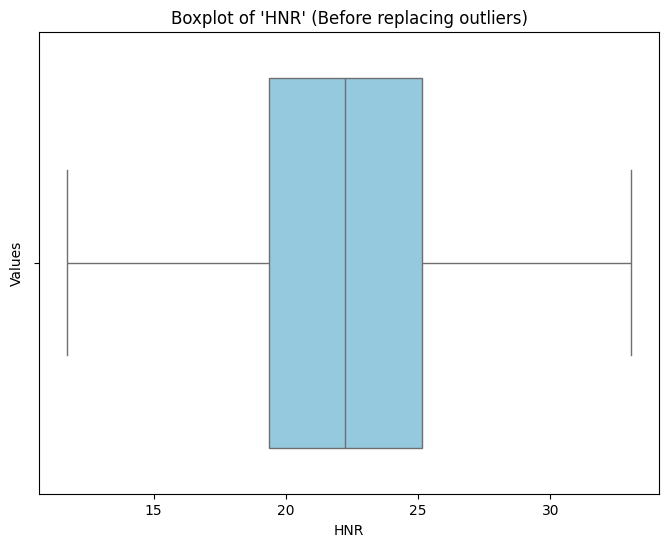

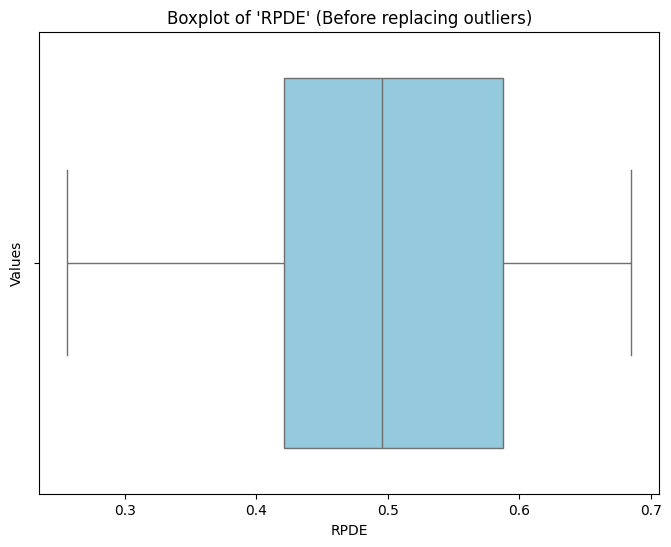

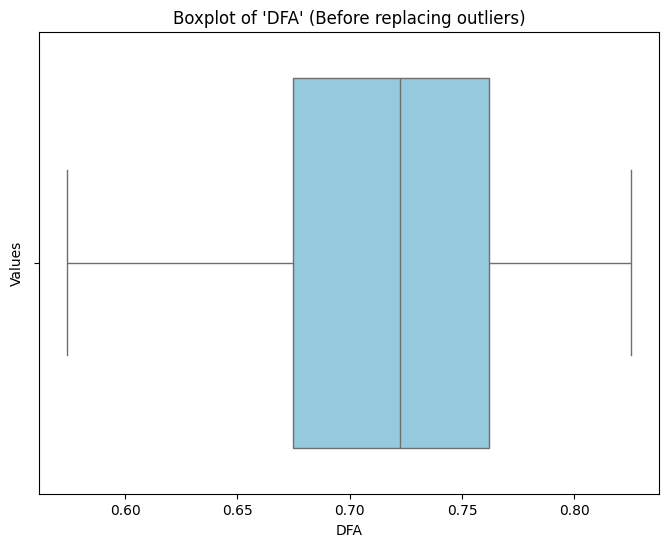

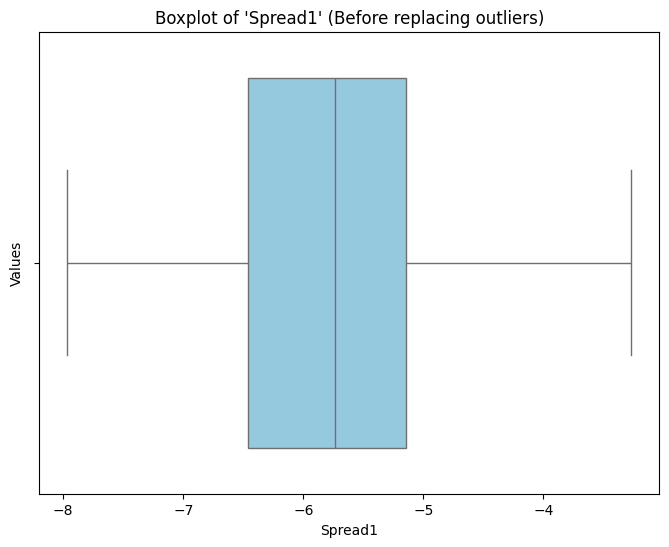

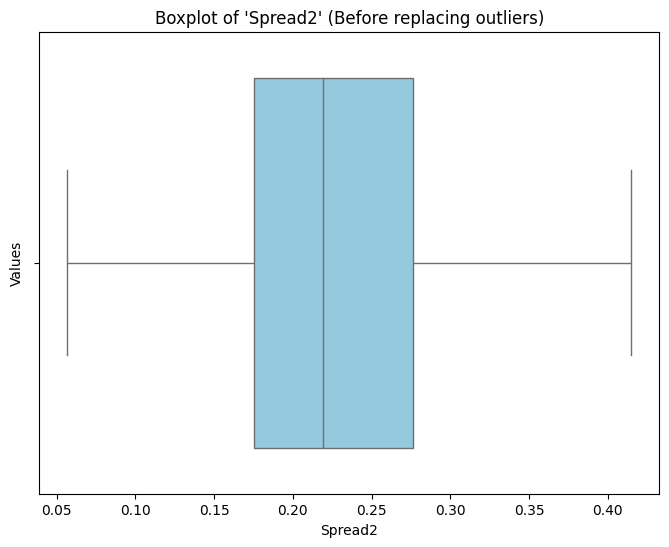

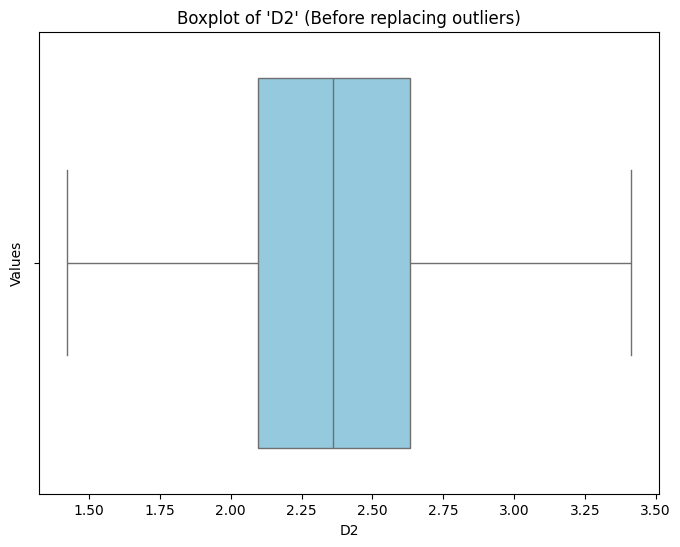

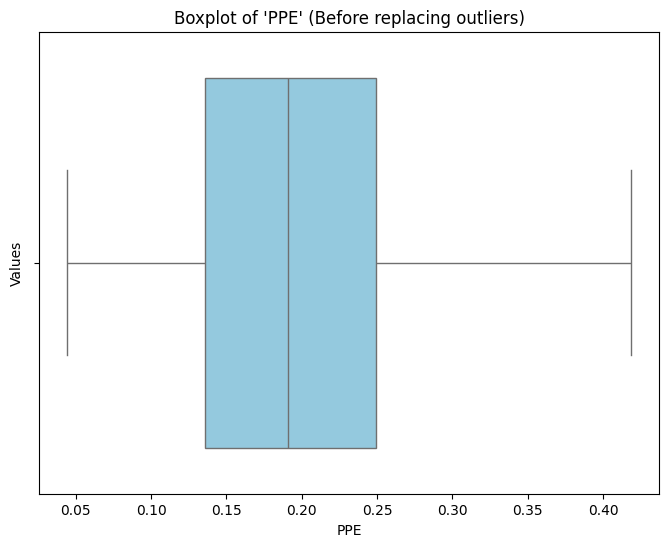


Outliers identified by variable:
MDVP_Fo: 0 values replaced with NaN
MDVP_Fhi: 0 values replaced with NaN
MDVP_Flo: 10 values replaced with NaN
MDVP_Jitter_percent: 0 values replaced with NaN
MDVP_Jitter_Abs: 0 values replaced with NaN
MDVP_RAP: 0 values replaced with NaN
MDVP_PPQ: 0 values replaced with NaN
Jitter_DDP: 0 values replaced with NaN
MDVP_Shim: 1 values replaced with NaN
MDVP_Shim_dB: 0 values replaced with NaN
Shimmer_APQ3: 2 values replaced with NaN
Shimmer_APQ5: 1 values replaced with NaN
MDVP_APQ: 0 values replaced with NaN
Shimmer_DDA: 2 values replaced with NaN
NHR: 0 values replaced with NaN
HNR: 0 values replaced with NaN
RPDE: 0 values replaced with NaN
DFA: 0 values replaced with NaN
Spread1: 0 values replaced with NaN
Spread2: 0 values replaced with NaN
D2: 0 values replaced with NaN
PPE: 0 values replaced with NaN

Rows with outliers marked as NaN:
               Name  MDVP_Fo  MDVP_Fhi  MDVP_Flo  MDVP_Jitter_percent  \
1    phon_R01_S01_2  122.400   148.650  

In [13]:
# Define the name of the status column (replace it with the actual name of your status column)
status_column = 'Status'  # Change 'Exitus' to the actual name of your status column

# Get the numerical columns (excluding the status column)
numeric_columns = renamed_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the status column from the numerical columns
numeric_columns = [col for col in numeric_columns if col != status_column]

# Create a boxplot for each numerical column to visualize the outliers before modifying them
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=renamed_df, x=col, color='skyblue')
    plt.title(f"Boxplot of '{col}' (Before replacing outliers)")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()

# Calculate the quartiles (Q1, Q3) for the remaining numerical columns
Q1 = renamed_df[numeric_columns].quantile(0.25)
Q3 = renamed_df[numeric_columns].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Identify the outliers
outliers = ((renamed_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (renamed_df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Display the outliers identified by variable
print("\nOutliers identified by variable:")

# Replace the outliers with NaN
renamed_df[outliers] = np.nan

# Display how many outliers were replaced
for col in numeric_columns:
    print(f"{col}: {outliers[col].sum()} values replaced with NaN")

# Display the rows with outliers before marking them as NaN
outliers_rows = renamed_df[outliers.any(axis=1)]
print("\nRows with outliers marked as NaN:")
print(outliers_rows)


In [8]:
# Calculate and display the number of null values in the dataset
null_counts = renamed_df.isnull().sum()
print("\nNumber of null values in the dataset:\n", null_counts)


Number of null values in the dataset:
 Name                    0
MDVP_Fo                 0
MDVP_Fhi               11
MDVP_Flo                9
MDVP_Jitter_percent    14
MDVP_Jitter_Abs         7
MDVP_RAP               14
MDVP_PPQ               15
Jitter_DDP             14
MDVP_Shim               8
MDVP_Shim_dB           10
Shimmer_APQ3            6
Shimmer_APQ5           13
MDVP_APQ               12
Shimmer_DDA             6
NHR                    19
HNR                     3
Status                  0
RPDE                    0
DFA                     0
Spread1                 4
Spread2                 2
D2                      1
PPE                     5
dtype: int64


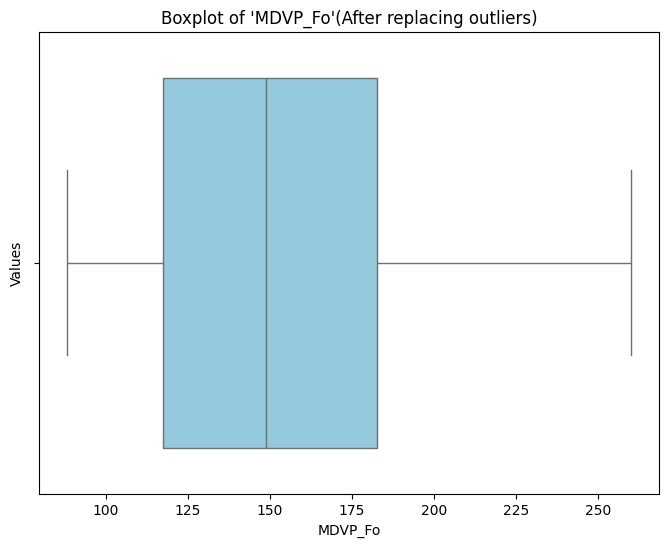

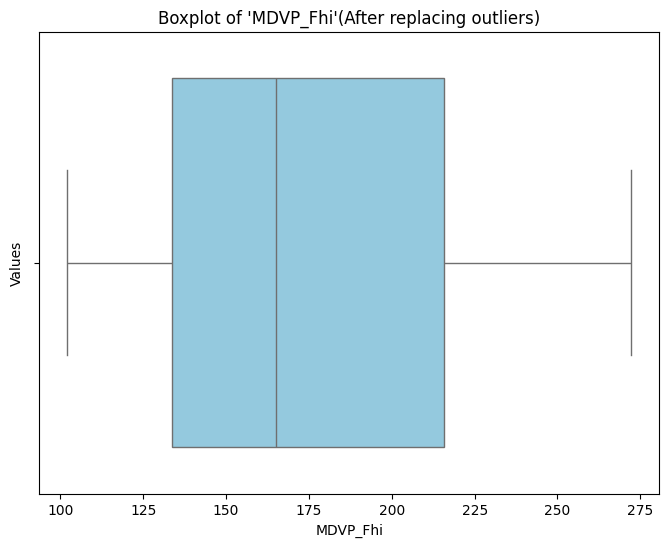

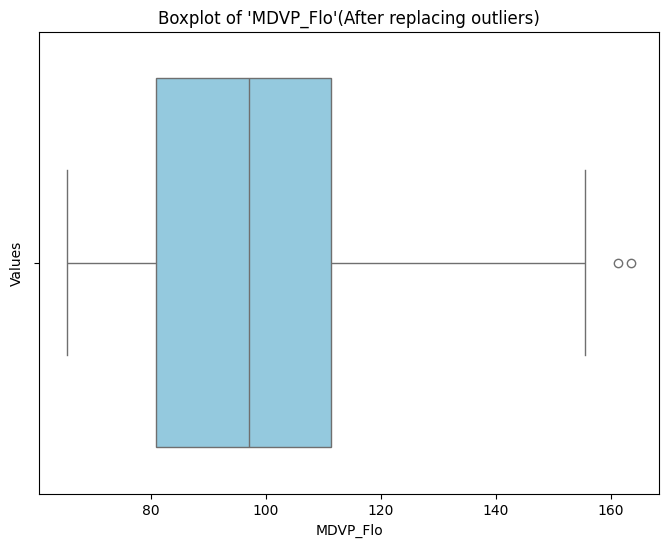

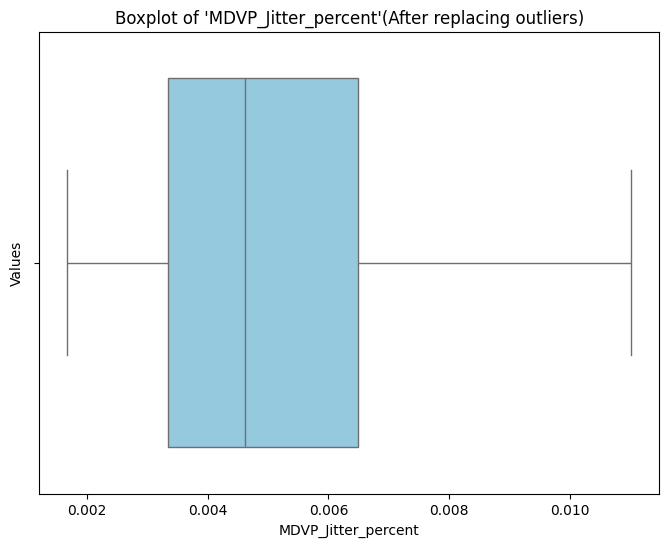

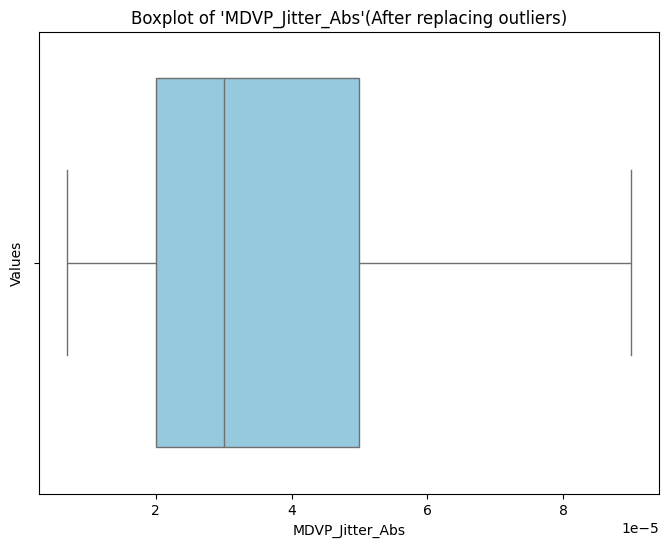

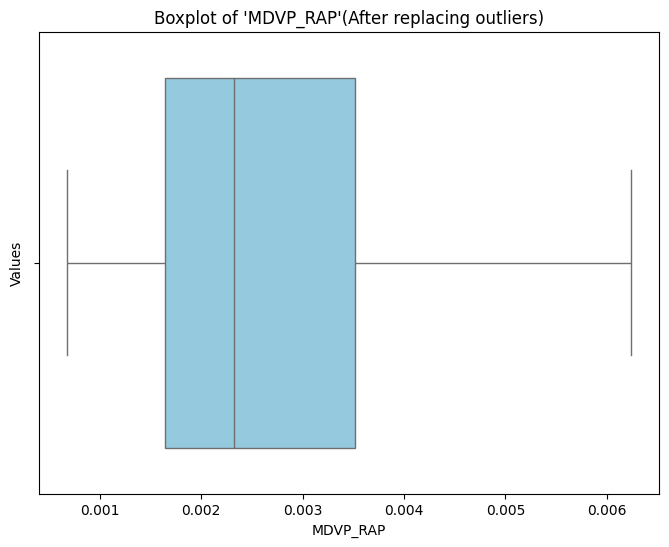

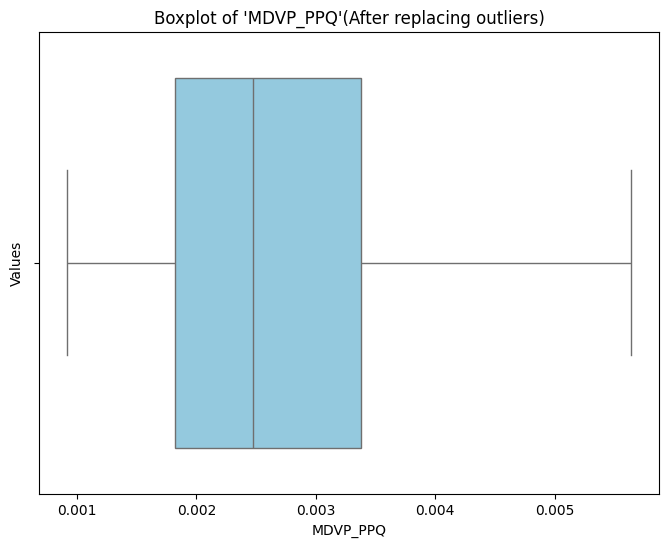

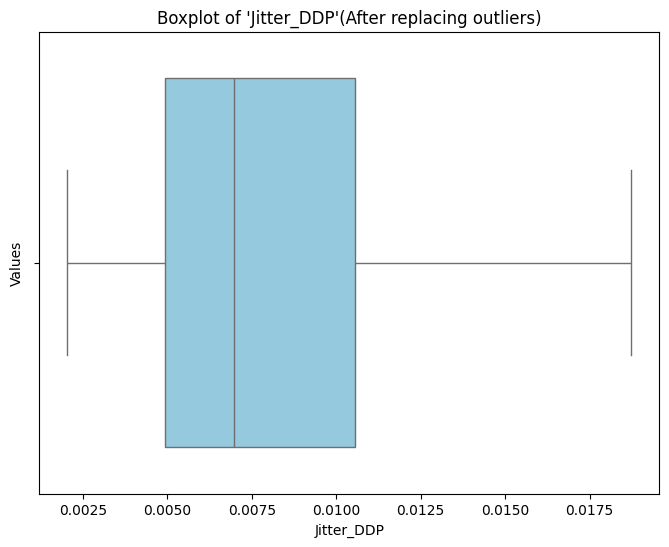

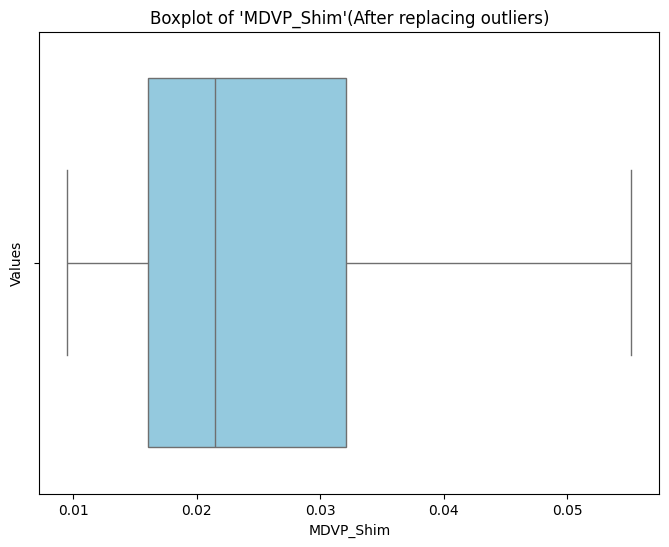

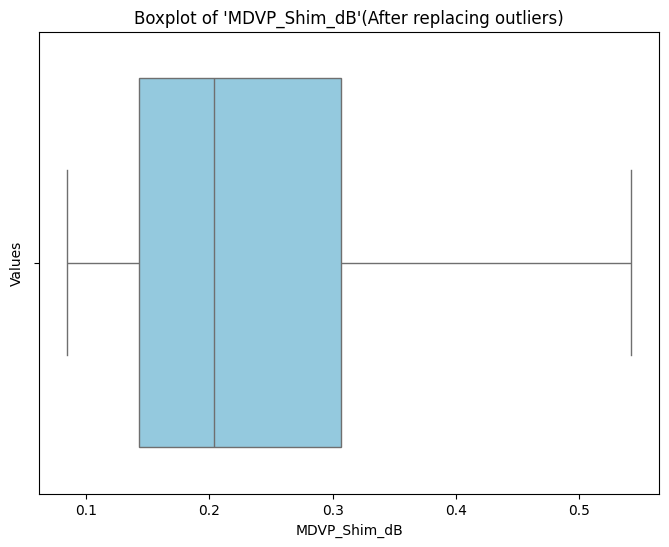

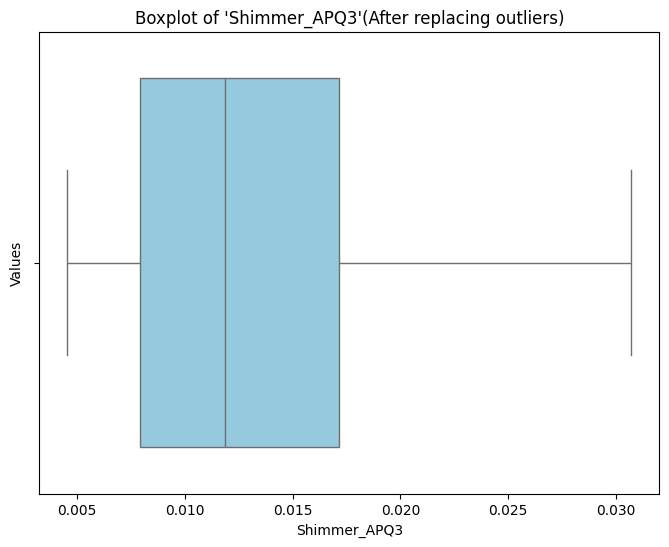

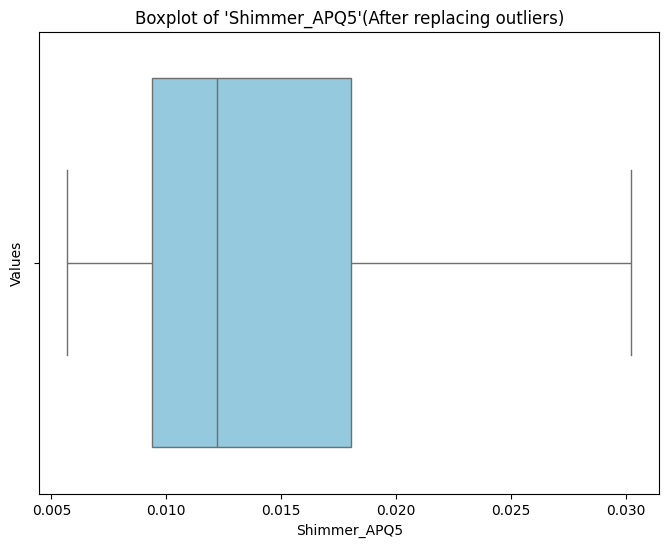

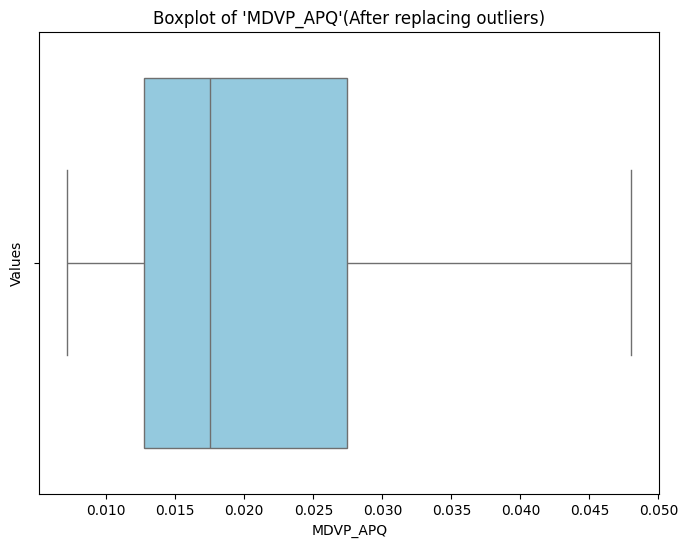

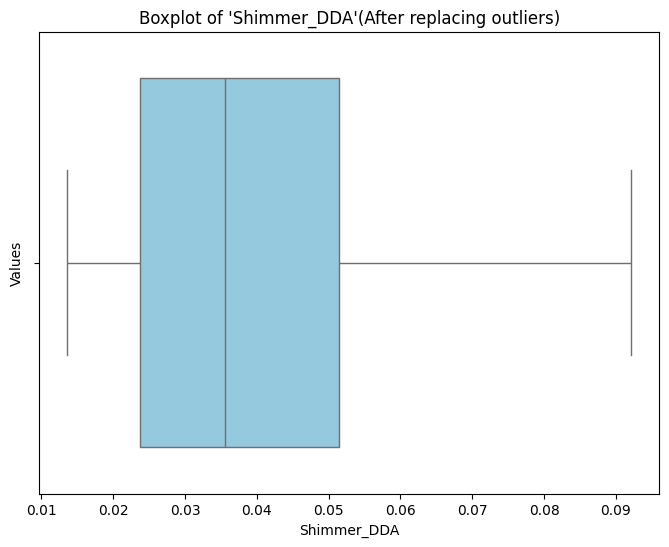

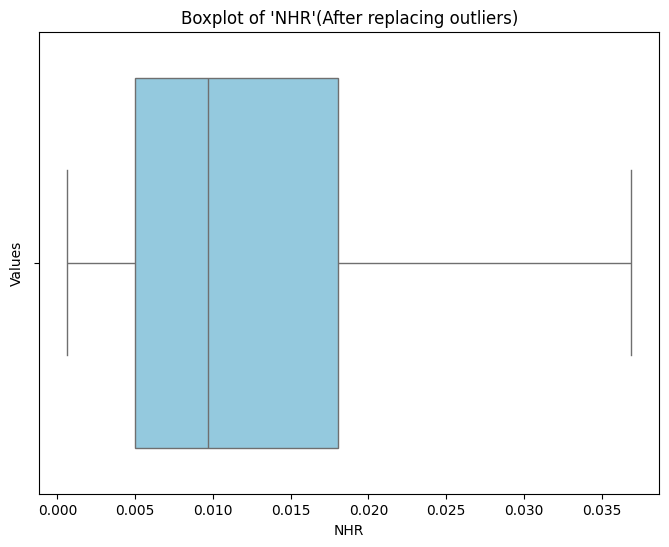

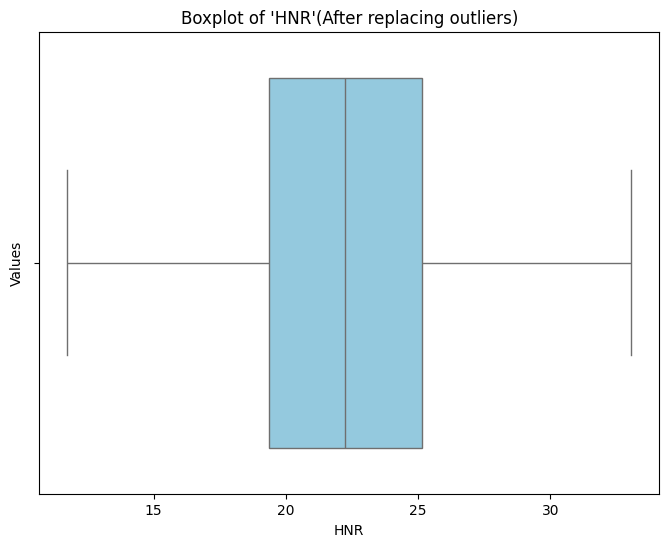

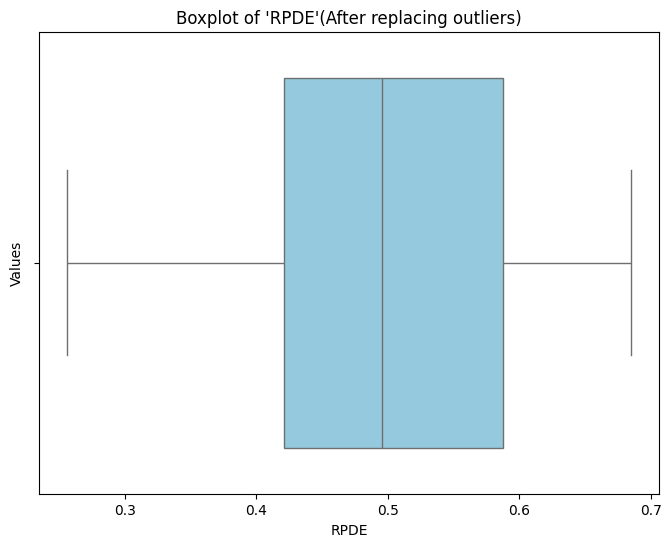

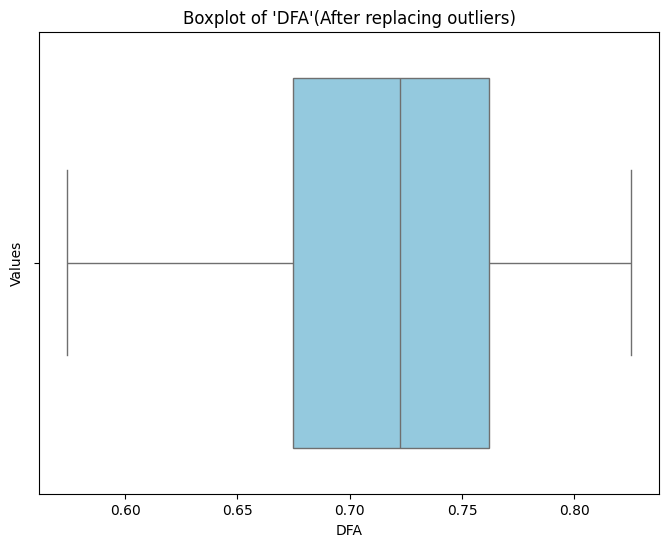

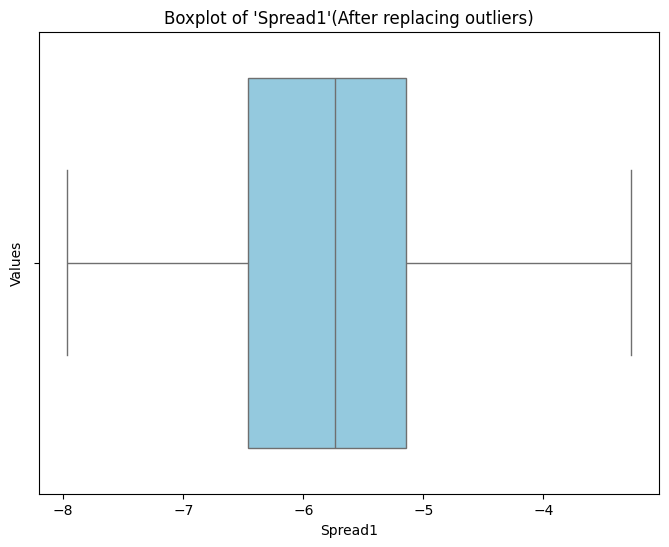

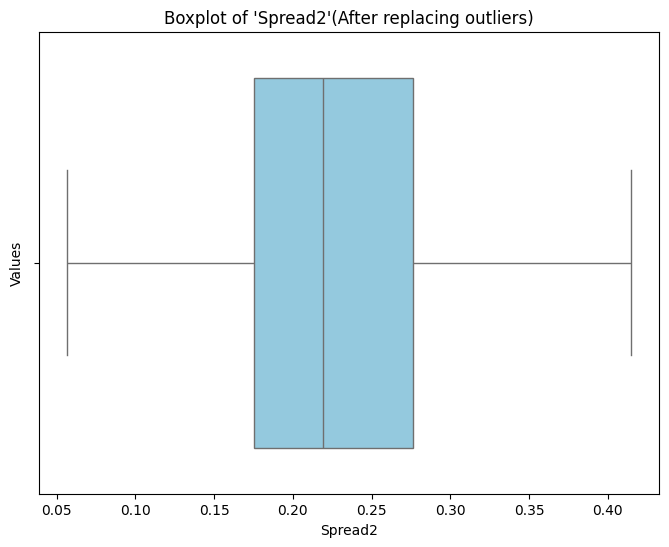

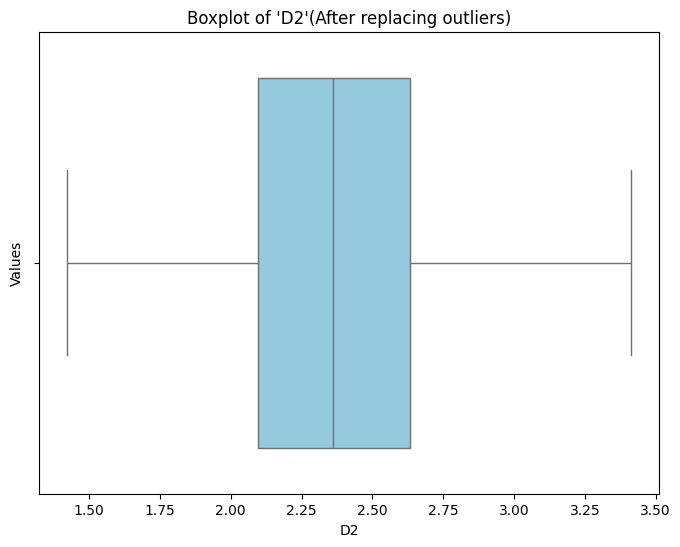

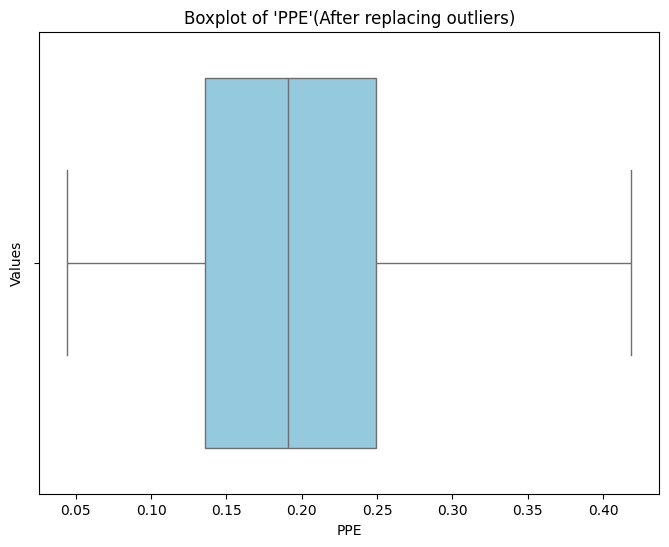

In [14]:
# Create a boxplot for each numerical column to visualize outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=renamed_df, x=col, color='skyblue')
    plt.title(f"Boxplot of '{col}'(After replacing outliers)")
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.show()


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the status column (replace with the actual name of your status column)
status_column = 'Status'  # Change 'Exitus' to the actual name of your status column

# Get the numerical columns (excluding the status column)
numeric_columns = renamed_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the status column from the numerical columns
numeric_columns = [col for col in numeric_columns if col != status_column]

# Apply the Iterative Imputer to the numerical columns with missing values
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)  # You can set max_iter and random_state as needed

# Fit and transform the numeric columns with missing values
renamed_df[numeric_columns] = iterative_imputer.fit_transform(renamed_df[numeric_columns])

# Display the dataframe after imputation
print("\nDataFrame after applying Iterative Imputer:")
print(renamed_df.head())  # Print the first few rows to check the imputed values


DataFrame after applying Iterative Imputer:
             Name  MDVP_Fo  MDVP_Fhi  MDVP_Flo  MDVP_Jitter_percent  \
0  phon_R01_S01_1  119.992   157.302    74.997             0.007840   
1  phon_R01_S01_2  122.400   148.650   113.819             0.009680   
2  phon_R01_S01_3  116.682   131.111   111.555             0.010500   
3  phon_R01_S01_4  116.676   137.871   111.366             0.009970   
4  phon_R01_S01_5  116.014   141.781   110.655             0.006197   

   MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shim  ...  \
0         0.000070  0.003700  0.005540    0.011090   0.043740  ...   
1         0.000080  0.004650  0.005618    0.013940   0.039146  ...   
2         0.000090  0.005440  0.005691    0.016330   0.052330  ...   
3         0.000090  0.005020  0.005600    0.015050   0.054920  ...   
4         0.000079  0.002595  0.004362    0.007792   0.038215  ...   

   Shimmer_DDA      NHR     HNR  Status      RPDE       DFA   Spread1  \
0     0.065450  0.02211  21.033   

In [17]:
# Calculate and display the number of null values in the dataset
null_counts = renamed_df.isnull().sum()
print("\nNumber of null values in the dataset:\n", null_counts)


Number of null values in the dataset:
 Name                   0
MDVP_Fo                0
MDVP_Fhi               0
MDVP_Flo               0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shim              0
MDVP_Shim_dB           0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
Status                 0
RPDE                   0
DFA                    0
Spread1                0
Spread2                0
D2                     0
PPE                    0
dtype: int64


#Correlation between variables

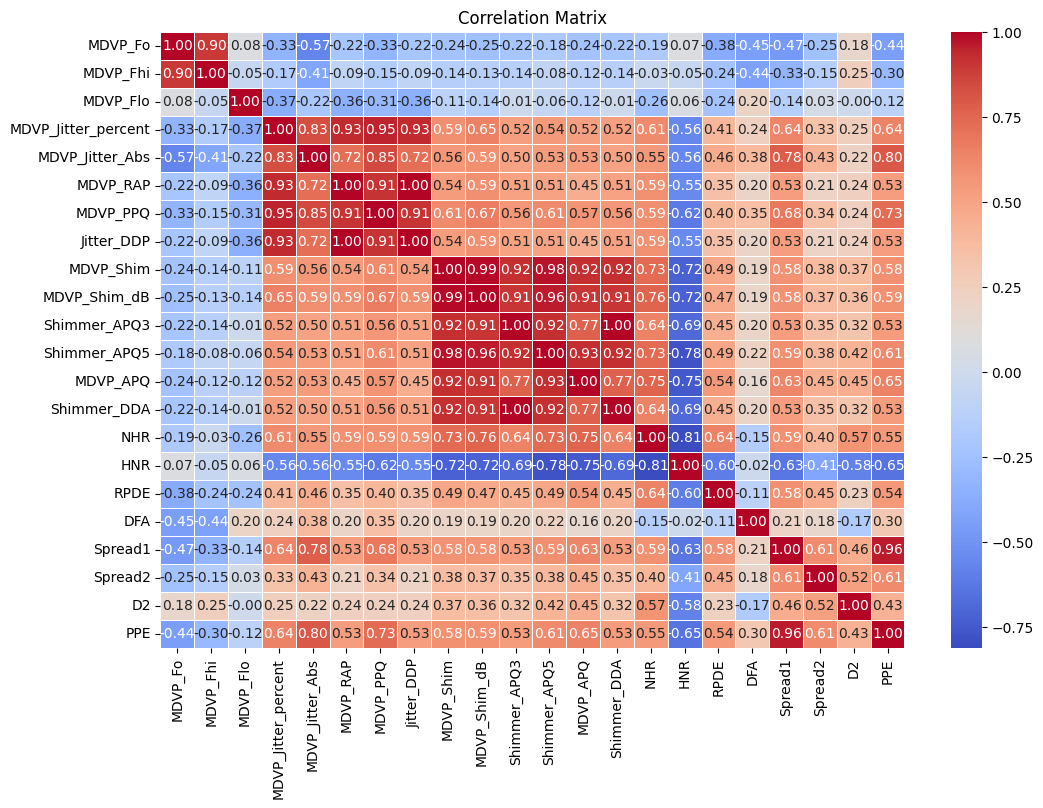

In [18]:
# Summary of the data (statistical description)
summary = renamed_df.describe()

renamed_df['Status'] = renamed_df['Status'].astype(int)  # Convert to integers


# Filter the numerical columns in the dataframe
numeric_columns = renamed_df.select_dtypes(include=['float64']).columns


# Calculate the correlation matrix only with the numerical columns
correlation_matrix = renamed_df[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Identify highly correlated variables and remove them
highly_correlated_vars = set()
threshold = 0.75
target_variable = 'Status'  # Change this to your target variable

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_with_target_var1 = abs(renamed_df[var1].corr(renamed_df[target_variable]))
            corr_with_target_var2 = abs(renamed_df[var2].corr(renamed_df[target_variable]))
            if corr_with_target_var1 < corr_with_target_var2:
                highly_correlated_vars.add(var1)
            else:
                highly_correlated_vars.add(var2)

# Display the variables identified as highly correlated
print("\nHighly correlated variables to remove:", highly_correlated_vars)

# Drop the highly correlated variables
filtered_df = renamed_df.drop(columns=highly_correlated_vars)



Highly correlated variables to remove: {'HNR', 'MDVP_Jitter_percent', 'MDVP_Shim', 'NHR', 'MDVP_RAP', 'Shimmer_DDA', 'Jitter_DDP', 'Shimmer_APQ5', 'MDVP_Jitter_Abs', 'MDVP_Shim_dB', 'PPE', 'Shimmer_APQ3', 'MDVP_PPQ', 'MDVP_Fhi'}


In [20]:
filtered_df

,Name,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,phon_R01_S01_1,119.992,74.997,0.02971,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,phon_R01_S01_2,122.400,113.819,0.04368,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,phon_R01_S01_3,116.682,111.555,0.03590,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,phon_R01_S01_4,116.676,111.366,0.03772,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,phon_R01_S01_5,116.014,110.655,0.04465,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,94.261,0.02745,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,phon_R01_S50_3,209.516,89.488,0.01879,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,phon_R01_S50_4,174.688,74.287,0.01667,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,phon_R01_S50_5,198.764,74.904,0.01588,0,0.451221,0.643956,-6.744577,0.207454,2.138608


#Differeces between controls and patients

<Figure size 800x600 with 0 Axes>

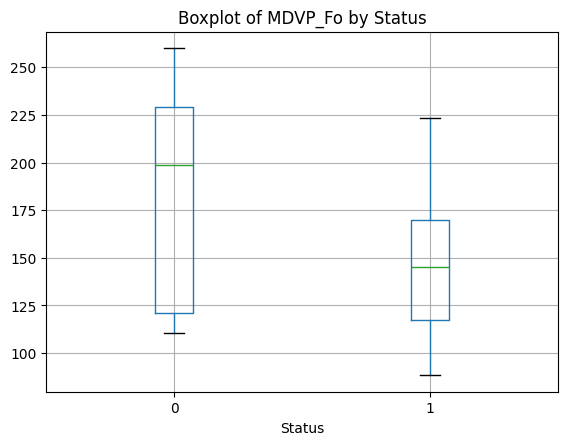

<Figure size 800x600 with 0 Axes>

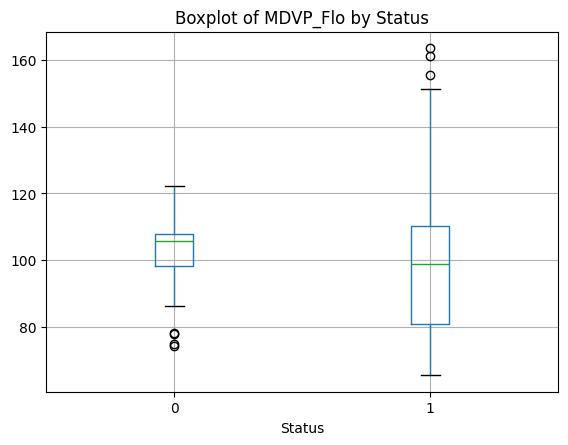

<Figure size 800x600 with 0 Axes>

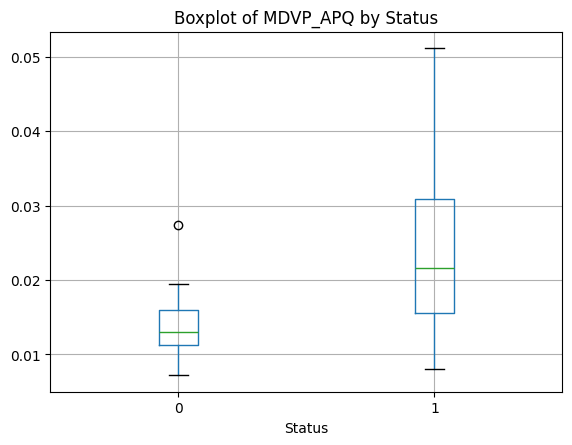

<Figure size 800x600 with 0 Axes>

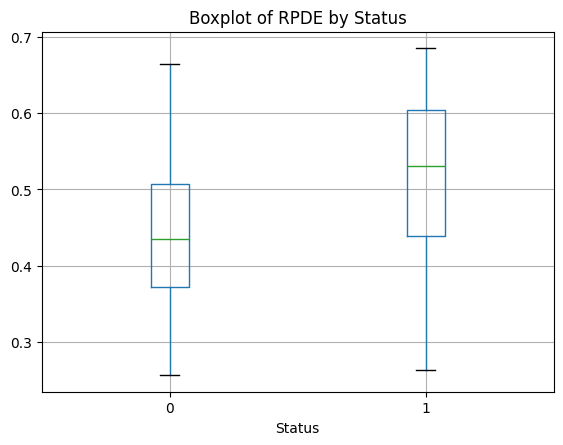

<Figure size 800x600 with 0 Axes>

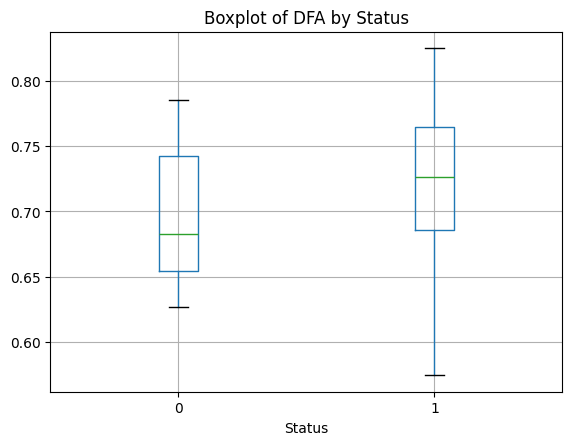

<Figure size 800x600 with 0 Axes>

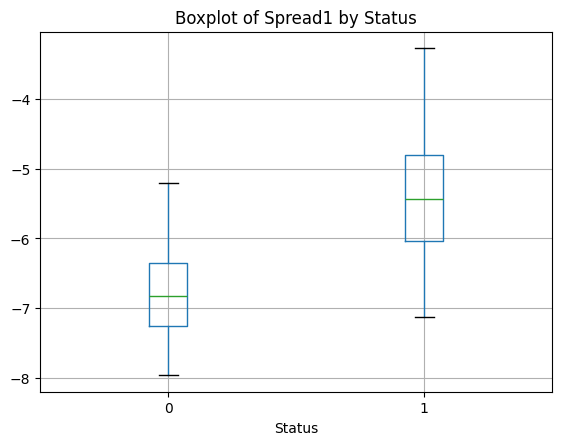

<Figure size 800x600 with 0 Axes>

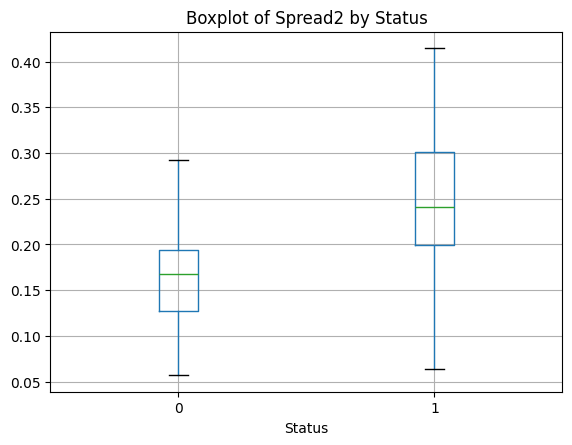

<Figure size 800x600 with 0 Axes>

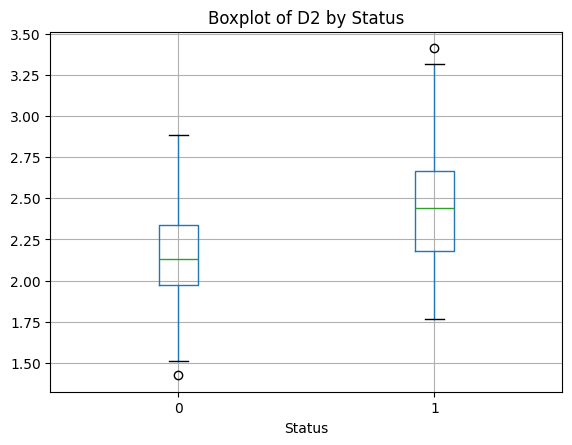

In [22]:
def generate_boxplots(df, group_variable):
    """
    Generates boxplots for all numerical variables in the DataFrame based on the group variable (e.g., 'Status').

    Args:
    - df: Pandas DataFrame containing the data.
    - group_variable: Name of the variable to group by (e.g., 'Status').
    """
    # Filter numerical columns from the DataFrame
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Create a plot for each numerical column
    for col in numerical_columns:
        if col != group_variable:
            plt.figure(figsize=(8, 6))
            df.boxplot(column=col, by=group_variable)
            plt.title(f'Boxplot of {col} by {group_variable}')
            plt.suptitle('')  # Suppress the default title
            plt.show()

# Using the function
generate_boxplots(filtered_df, 'Status')

#Group and average function

In [23]:
def group_and_average(df):
    """
    Aggregate variables by averaging them for each subject.

    The subject and trial information is extracted from the 'Subject_ID' column. The output
    will have one row per subject, averaged across all trials.

    Parameters:
        df (pd.DataFrame): Dataframe containing the 'Subject_ID' column.

    Returns:
        aggregated_df (pd.DataFrame): Dataframe aggregated by subject.
    """
    # Extraer el identificador del sujeto
    df['name'] = df['Name'].str.extract(r'_S(\d+)_')[0]

    # Seleccionar solo columnas numéricas para evitar errores
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    numeric_columns['name'] = df['name']  # Incluir la columna para agrupar

    # Agrupar por el nuevo identificador y calcular la media
    grouped = numeric_columns.groupby('name').mean().reset_index()

    return grouped

In [24]:
# Apply the function to the data
final_df = group_and_average(filtered_df)

# View the results
final_df.head()


,name,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,01,118.719333,106.029833,0.037348,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642
1,02,99.770333,95.413167,0.018123,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428
2,04,147.346167,87.532333,0.018410,1.0,0.521660,0.645843,-5.716261,0.226424,2.360638
3,05,159.837667,86.767167,0.043375,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869
4,06,150.644667,78.278333,0.020725,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360


#Transform the variable 'Name' into tho new columns 'Subject_ID' and 'Trials'

In [25]:
# Create 'subject_id' column by extracting the subject part (e.g., S01, S50)
renamed_df['Subject_ID'] = renamed_df['Name'].str.extract(r'_(S\d+)_')[0]

# Create 'trial' column by extracting the trial number and prepending 't' (e.g., t1, t2)
renamed_df['Trial'] = 't' + renamed_df['Name'].str.extract(r'_(\d+)$')[0]

# Drop the 'name' column
renamed_df.drop(columns=['Name'], inplace=True)

# Display the modified DataFrame
renamed_df.head()

,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shim,MDVP_Shim_dB,...,HNR,Status,RPDE,DFA,Spread1,Spread2,D2,PPE,Subject_ID,Trial
0,119.992,157.302,74.997,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,...,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,t1
1,122.400,148.650,113.819,0.009680,0.000080,0.004650,0.005618,0.013940,0.039146,0.379153,...,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,t2
2,116.682,131.111,111.555,0.010500,0.000090,0.005440,0.005691,0.016330,0.052330,0.482000,...,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01,t3
3,116.676,137.871,111.366,0.009970,0.000090,0.005020,0.005600,0.015050,0.054920,0.517000,...,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01,t4
4,116.014,141.781,110.655,0.006197,0.000079,0.002595,0.004362,0.007792,0.038215,0.354433,...,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01,t5


#scat_plot function

In [26]:
def scatter_plot(df, var1, var2, groups):
    """
    Create a scatter plot of two variables colored by group.

    Parameters:
        df (pd.DataFrame): Dataframe
        var1 (str): Variable for x-axis
        var2 (str): Variable for y-axis
        groups (str): Column defining groups
    """
    unique_groups = df[groups].unique()
    for group in unique_groups:
        subset = df[df[groups] == group]
        plt.scatter(subset[var1], subset[var2], label=group)

    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()
    plt.title(f'Scatterplot of {var1} vs {var2} by {groups}')
    plt.show()

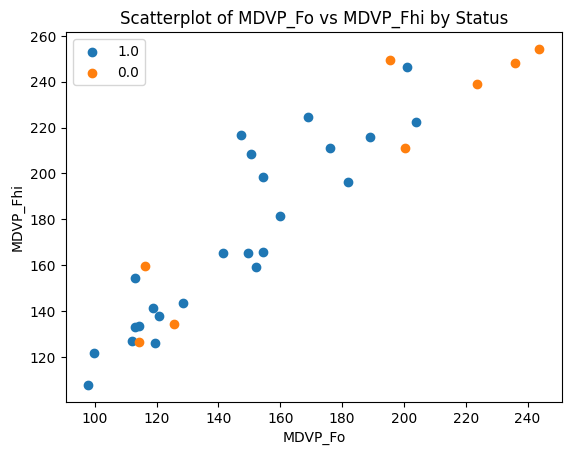

In [ ]:
scatter_plot(final_df, var1='MDVP_Fo', var2='MDVP_Fhi', groups='Status')


#Normalization functions

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize_dataframe(df, method='z-score', exclude_columns=None):
    """
    Normalizes all variables in the DataFrame using either Z-score or Min-Max normalization.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - method (str): The normalization method, either 'z-score' or 'min-max'.
    - exclude_columns (list): List of columns to exclude from normalization (e.g., identifiers, categorical variables).

    Returns:
    - pd.DataFrame: A DataFrame with normalized variables.
    """
    # Copy the dataframe to avoid modifying the original
    df_normalized = df.copy()

    # Exclude specific columns from normalization
    if exclude_columns is None:
        exclude_columns = []

    # Select columns to normalize (numerical columns excluding the excluded ones)
    columns_to_normalize = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

    # Apply normalization
    if method == 'z-score':
        scaler = StandardScaler()
        df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    elif method == 'min-max':
        scaler = MinMaxScaler()
        df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    else:
        raise ValueError("Invalid normalization method. Choose 'z-score' or 'min-max'.")

    return df_normalized

# Example usage with your dataset:
# Assuming `df` is your DataFrame and excluding the "Name" and "Status" columns from normalization
normalized_df = normalize_dataframe(df, method='z-score', exclude_columns=['Name', 'Status', 'name'])
print(normalized_df.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1    -0.829300     -0.436165     -0.952037        0.334914   
1  phon_R01_S01_2    -0.770972     -0.530974     -0.057721        0.715418   
2  phon_R01_S01_3    -0.909476     -0.723168     -0.109875        0.884991   
3  phon_R01_S01_4    -0.909622     -0.649092     -0.114229        0.775389   
4  phon_R01_S01_5    -0.925657     -0.606245     -0.130608        1.368893   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0          0.749759  0.132963  0.760800    0.131755      0.745985  ...   
1          1.037674  0.453892  1.276809    0.452684      1.681731  ...   
2          1.325589  0.720770  1.585687    0.721813      1.202693  ...   
3          1.325589  0.578885  1.284076    0.577677      1.340396  ...   
4          1.901418  1.095750  2.047187    1.096793      1.836448  ...   

   Shimmer:DDA       NHR       HNR    status      RPDE       DFA   spread1  \
0     0.

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df, method='min-max', exclude_columns=None):
    """
    Normalizes all variables in the DataFrame using either Z-score or Min-Max normalization.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - method (str): The normalization method, either 'z-score' or 'min-max'.
    - exclude_columns (list): List of columns to exclude from normalization (e.g., identifiers, categorical variables).

    Returns:
    - pd.DataFrame: A DataFrame with normalized variables.
    """
    # Copy the dataframe to avoid modifying the original
    df_normalized = df.copy()

    # Exclude specific columns from normalization
    if exclude_columns is None:
        exclude_columns = []

    # Select columns to normalize (numerical columns excluding the excluded ones)
    columns_to_normalize = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

    # Apply normalization
    if method == 'z-score':
        scaler = StandardScaler()
        df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    elif method == 'min-max':
        scaler = MinMaxScaler()
        df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    else:
        raise ValueError("Invalid normalization method. Choose 'z-score' or 'min-max'.")

    return df_normalized

# Ejemplo con tu dataset
# Suponiendo que el DataFrame se llama `df` y excluimos "Name", "Status", y "name"
normalized_df = normalize_dataframe(filtered_df, method='min-max', exclude_columns=['Name', 'Status', 'name'])
print(normalized_df.head())


             Name   MDVP_Fo  MDVP_Flo  MDVP_APQ  Status      RPDE       DFA  \
0  phon_R01_S01_1  0.184308  0.097066  0.512031       1  0.369155  0.960148   
1  phon_R01_S01_2  0.198327  0.492853  0.829664       1  0.470830  0.977024   
2  phon_R01_S01_3  0.165039  0.469772  0.652772       1  0.404416  1.000000   
3  phon_R01_S01_4  0.165004  0.467845  0.694153       1  0.416255  0.975885   
4  phon_R01_S01_5  0.161150  0.460597  0.851718       1  0.375159  0.992813   

    Spread1   Spread2        D2 name  
0  0.671271  0.585722  0.441204   01  
1  0.828409  0.778807  0.534359   01  
2  0.750039  0.710587  0.461711   01  
3  0.819398  0.774776  0.493512   01  
4  0.898136  0.496401  0.456647   01  


In [31]:
# If you want to remove the column in-place (without creating a new DataFrame), use the following:
normalized_df.drop('name', axis=1, inplace=True)

In [32]:
normalized_df

,Name,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,phon_R01_S01_1,0.184308,0.097066,0.512031,1,0.369155,0.960148,0.671271,0.585722,0.441204
1,phon_R01_S01_2,0.198327,0.492853,0.829664,1,0.470830,0.977024,0.828409,0.778807,0.534359
2,phon_R01_S01_3,0.165039,0.469772,0.652772,1,0.404416,1.000000,0.750039,0.710587,0.461711
3,phon_R01_S01_4,0.165004,0.467845,0.694153,1,0.416255,0.975885,0.819398,0.774776,0.493512
4,phon_R01_S01_5,0.161150,0.460597,0.851718,1,0.375159,0.992813,0.898136,0.496401,0.456647
...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,0.499820,0.293461,0.460646,0,0.447684,0.333127,0.303780,0.181910,0.620083
191,phon_R01_S50_3,0.705488,0.244801,0.263746,0,0.408567,0.434101,0.376884,0.202448,0.683808
192,phon_R01_S50_4,0.502730,0.089828,0.215544,0,0.352318,0.324299,0.250833,0.283892,0.631285
193,phon_R01_S50_5,0.642893,0.096118,0.197582,0,0.454176,0.277579,0.259910,0.420799,0.359392


In [33]:
# Save the DataFrame to an Excel file
excel_file = 'NEW_cleaned_df.csv'  # Replace with your desired file path and name
normalized_df.to_csv(excel_file, index=False)